### **Exercises of Algorithmic Toolbox Week 6**
By Group 3 of Algorithms

Universidad Nacional de Colombia

#### **1. Maximum amount of gold** 

In [ ]:
import sys

def optimal_weight(W, w):
    value = [[0]*(len(w)+1) for _ in range(W+1)]
    for i in range(1,len(w)+1):
        for j in range(1,W+1):
            value[j][i] = value[j][i-1]
            if w[i-1] <= j:
                val = value[j-w[i-1]][i-1] + w[i-1]
                if val >= value[j][i]:
                    value[j][i] = val
    return value[W][len(w)]             



if __name__ == '__main__':
    input = sys.stdin.read()
    W, n, *w = list(map(int, input.split()))
    print(optimal_weight(W, w))

#### **2. Partitioning souvenirs** 

In [ ]:
import numpy

# Discrete Knapsack problem without repetition
def partitions(W, n, items):
    """ Finds if number of partitions having capacity W is >=3
    (int, int, list) -> (int) """
    count = 0 
    value = numpy.zeros((W+1, n+1))
    for i in range(1, W+1):
        for j in range(1, n+1):
            value[i][j] = value[i][j-1]
            if items[j-1]<=i:
                temp = value[i-items[j-1]][j-1] + items[j-1]
                if temp > value[i][j]:
                    value[i][j] = temp
            if value[i][j] == W: count += 1

    if count < 3: print('0')
    else: print('1')

if __name__ == '__main__':
    n = int(input())
    item_weights = [int(i) for i in input().split()]
    total_weight = sum(item_weights)
    if n<3: 
        print('0')
    elif total_weight%3 != 0: 
        print('0')
    else:
        partitions(total_weight//3, n, item_weights)

#### **3. Maximium value of an arithmetic expression** 

In [ ]:
def evalt(a, b, op):
    if op == '+':
        return a + b
    elif op == '-':
        return a - b
    elif op == '*':
        return a * b
    else:
        assert False


def get_maximum_value(dataset):
	d = dataset[::2]
	op = dataset[1::2]
	d=[float(i) for i in d]
	m = [[0]*(len(d)+1) for _ in range(len(d)+1)]
	M = [[0]*(len(d)+1) for _ in range(len(d)+1)]
	for i in range(1,len(d)+1):
		m[i][i] = M[i][i] = d[i-1]
	n = len(d)
	for s in range(1,n):
		for i in range(1,n-s+1):
			j = i+s
			mini,maxi = float('inf'),float('-inf')
			for k in range(i,j):
				a = evalt(M[i][k],M[k+1][j],op[k-1])
				b = evalt(M[i][k],m[k+1][j],op[k-1])
				c = evalt(m[i][k],M[k+1][j],op[k-1])
				d = evalt(m[i][k],m[k+1][j],op[k-1])
				mini = min(mini,a,b,c,d)
				maxi = max(maxi,a,b,c,d)
			m[i][j] = mini
			M[i][j]	= maxi
	return M[1][n]


if __name__ == "__main__":
    print(int(get_maximum_value(input())))

### Grader passed all exercises proof:


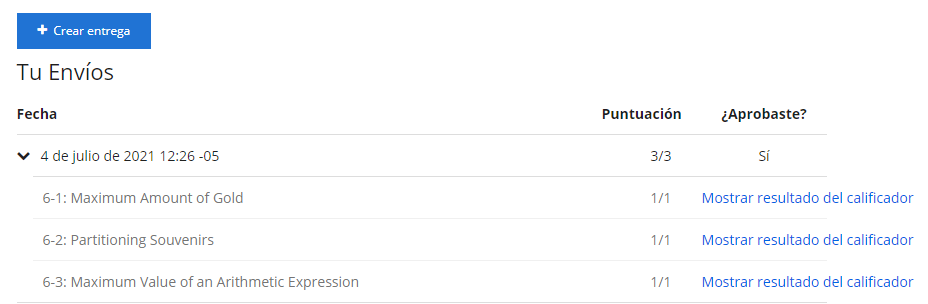